**21-03-19 ML_DL 01_머신러닝_지도학습 (c)cherryuki (ji)**

## 머신러닝: 지도학습- 분류, 회귀 / 비지도학습- 군집

# 01. Linear Regression(선형 회귀)
## 1.1 기존의 프로그램 방식

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#섭씨 온도(input data) 를 받아 화씨 온도(target data) 출력
def celsius_to_fahrenheit(x):
    return x*1.8+32

In [4]:
input_c = int(input("섭씨온도는?"))
print("화씨 온도는", celsius_to_fahrenheit(input_c))

섭씨온도는?1
화씨 온도는 33.8


## 1.2 머신러닝 프로그램 방식
1. 데이터 셋 확보 및 생성
2. 데이터 전처리: 훈련데이터셋, 검증데이터셋, 시험데이터 셋, ...
3. 모델 구성
4. 모델 학습과정 설정
5. 모델 학습 시키기
6. 모델 평가(시험 데이터 셋)
7. 모델 사용(입력값 주고 예측값 받기)

In [6]:
from tensorflow.keras.models import Sequential #3. 모델 생성시
from tensorflow.keras.layers import Dense #입력값과 출력값

In [7]:
#1&2 데이터
data_C = np.array(range(100))
data_C #입력값(input data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [8]:
data_F = celsius_to_fahrenheit(data_C)
data_F #목적값(target value)

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [9]:
#3. 모델 구성
model = Sequential()
model.add(Dense(1, input_dim=1)) #input_dim=1: 독립변수 1개, 앞부분 숫자: target 데이터 개수(1개)

#4. 모델학습과정 설정
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
#학습전 예측
print(model.predict([0]))

[[0.]]


In [12]:
model.save('model/before_learning.h5')

In [13]:
#2. 컴퓨터에게 학습시키기 위해 normalize함(전체의 편차 줄이기. 이상적인 편차 0~1)
scaled_data_C = data_C/100.0
scaled_data_F = data_F/100.0
print(scaled_data_C, end='\n\n')
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]

[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76

In [14]:
#4. 모델 학습시키기
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 1.5892 - mae: 1.1607
Epoch 2/1000
4/4 - 0s - loss: 1.5609 - mae: 1.1493
Epoch 3/1000
4/4 - 0s - loss: 1.5403 - mae: 1.1409
Epoch 4/1000
4/4 - 0s - loss: 1.5238 - mae: 1.1342
Epoch 5/1000
4/4 - 0s - loss: 1.5081 - mae: 1.1278
Epoch 6/1000
4/4 - 0s - loss: 1.4917 - mae: 1.1211
Epoch 7/1000
4/4 - 0s - loss: 1.4760 - mae: 1.1146
Epoch 8/1000
4/4 - 0s - loss: 1.4627 - mae: 1.1091
Epoch 9/1000
4/4 - 0s - loss: 1.4494 - mae: 1.1036
Epoch 10/1000
4/4 - 0s - loss: 1.4343 - mae: 1.0972
Epoch 11/1000
4/4 - 0s - loss: 1.4208 - mae: 1.0915
Epoch 12/1000
4/4 - 0s - loss: 1.4076 - mae: 1.0860
Epoch 13/1000
4/4 - 0s - loss: 1.3930 - mae: 1.0798
Epoch 14/1000
4/4 - 0s - loss: 1.3792 - mae: 1.0738
Epoch 15/1000
4/4 - 0s - loss: 1.3663 - mae: 1.0683
Epoch 16/1000
4/4 - 0s - loss: 1.3523 - mae: 1.0622
Epoch 17/1000
4/4 - 0s - loss: 1.3381 - mae: 1.0560
Epoch 18/1000
4/4 - 0s - loss: 1.3250 - mae: 1.0503
Epoch 19/1000
4/4 - 0s - loss: 1.3122 - mae: 1.0447
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.1627 - mae: 0.3312
Epoch 159/1000
4/4 - 0s - loss: 0.1596 - mae: 0.3284
Epoch 160/1000
4/4 - 0s - loss: 0.1559 - mae: 0.3247
Epoch 161/1000
4/4 - 0s - loss: 0.1525 - mae: 0.3215
Epoch 162/1000
4/4 - 0s - loss: 0.1496 - mae: 0.3187
Epoch 163/1000
4/4 - 0s - loss: 0.1467 - mae: 0.3158
Epoch 164/1000
4/4 - 0s - loss: 0.1434 - mae: 0.3126
Epoch 165/1000
4/4 - 0s - loss: 0.1402 - mae: 0.3095
Epoch 166/1000
4/4 - 0s - loss: 0.1370 - mae: 0.3063
Epoch 167/1000
4/4 - 0s - loss: 0.1339 - mae: 0.3031
Epoch 168/1000
4/4 - 0s - loss: 0.1313 - mae: 0.3007
Epoch 169/1000
4/4 - 0s - loss: 0.1280 - mae: 0.2974
Epoch 170/1000
4/4 - 0s - loss: 0.1259 - mae: 0.2950
Epoch 171/1000
4/4 - 0s - loss: 0.1240 - mae: 0.2931
Epoch 172/1000
4/4 - 0s - loss: 0.1217 - mae: 0.2909
Epoch 173/1000
4/4 - 0s - loss: 0.1191 - mae: 0.2882
Epoch 174/1000
4/4 - 0s - loss: 0.1170 - mae: 0.2858
Epoch 175/1000
4/4 - 0s - loss: 0.1153 - mae: 0.2841
Epoch 176/1000
4/4 - 0s - loss: 0.1127 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0288 - mae: 0.1465
Epoch 314/1000
4/4 - 0s - loss: 0.0284 - mae: 0.1455
Epoch 315/1000
4/4 - 0s - loss: 0.0281 - mae: 0.1447
Epoch 316/1000
4/4 - 0s - loss: 0.0277 - mae: 0.1438
Epoch 317/1000
4/4 - 0s - loss: 0.0274 - mae: 0.1428
Epoch 318/1000
4/4 - 0s - loss: 0.0271 - mae: 0.1420
Epoch 319/1000
4/4 - 0s - loss: 0.0268 - mae: 0.1413
Epoch 320/1000
4/4 - 0s - loss: 0.0266 - mae: 0.1405
Epoch 321/1000
4/4 - 0s - loss: 0.0263 - mae: 0.1398
Epoch 322/1000
4/4 - 0s - loss: 0.0260 - mae: 0.1391
Epoch 323/1000
4/4 - 0s - loss: 0.0257 - mae: 0.1385
Epoch 324/1000
4/4 - 0s - loss: 0.0254 - mae: 0.1377
Epoch 325/1000
4/4 - 0s - loss: 0.0251 - mae: 0.1367
Epoch 326/1000
4/4 - 0s - loss: 0.0247 - mae: 0.1358
Epoch 327/1000
4/4 - 0s - loss: 0.0244 - mae: 0.1349
Epoch 328/1000
4/4 - 0s - loss: 0.0241 - mae: 0.1340
Epoch 329/1000
4/4 - 0s - loss: 0.0238 - mae: 0.1332
Epoch 330/1000
4/4 - 0s - loss: 0.0235 - mae: 0.1323
Epoch 331/1000
4/4 - 0s - loss: 0.0232 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 6.5854e-04 - mae: 0.0221
Epoch 469/1000
4/4 - 0s - loss: 6.1626e-04 - mae: 0.0214
Epoch 470/1000
4/4 - 0s - loss: 5.7888e-04 - mae: 0.0206
Epoch 471/1000
4/4 - 0s - loss: 5.3840e-04 - mae: 0.0199
Epoch 472/1000
4/4 - 0s - loss: 4.9789e-04 - mae: 0.0193
Epoch 473/1000
4/4 - 0s - loss: 4.6498e-04 - mae: 0.0186
Epoch 474/1000
4/4 - 0s - loss: 4.2746e-04 - mae: 0.0179
Epoch 475/1000
4/4 - 0s - loss: 3.8548e-04 - mae: 0.0169
Epoch 476/1000
4/4 - 0s - loss: 3.5299e-04 - mae: 0.0162
Epoch 477/1000
4/4 - 0s - loss: 3.2038e-04 - mae: 0.0155
Epoch 478/1000
4/4 - 0s - loss: 2.9311e-04 - mae: 0.0148
Epoch 479/1000
4/4 - 0s - loss: 2.5899e-04 - mae: 0.0139
Epoch 480/1000
4/4 - 0s - loss: 2.3080e-04 - mae: 0.0131
Epoch 481/1000
4/4 - 0s - loss: 2.0776e-04 - mae: 0.0123
Epoch 482/1000
4/4 - 0s - loss: 1.8602e-04 - mae: 0.0117
Epoch 483/1000
4/4 - 0s - loss: 1.6570e-04 - mae: 0.0111
Epoch 484/1000
4/4 - 0s - loss: 1.3997e-04 - mae: 0.0102
Epoch 485/1000
4/4 - 0s - loss:

Epoch 606/1000
4/4 - 0s - loss: 6.3672e-07 - mae: 7.7953e-04
Epoch 607/1000
4/4 - 0s - loss: 8.7405e-07 - mae: 9.1386e-04
Epoch 608/1000
4/4 - 0s - loss: 2.0484e-07 - mae: 4.4286e-04
Epoch 609/1000
4/4 - 0s - loss: 1.7906e-07 - mae: 4.0031e-04
Epoch 610/1000
4/4 - 0s - loss: 8.0969e-07 - mae: 8.4560e-04
Epoch 611/1000
4/4 - 0s - loss: 1.0471e-06 - mae: 9.7106e-04
Epoch 612/1000
4/4 - 0s - loss: 5.3862e-09 - mae: 6.2244e-05
Epoch 613/1000
4/4 - 0s - loss: 2.2169e-09 - mae: 4.2218e-05
Epoch 614/1000
4/4 - 0s - loss: 1.3255e-08 - mae: 9.4160e-05
Epoch 615/1000
4/4 - 0s - loss: 1.5701e-06 - mae: 0.0011
Epoch 616/1000
4/4 - 0s - loss: 9.2814e-07 - mae: 7.8729e-04
Epoch 617/1000
4/4 - 0s - loss: 1.0550e-09 - mae: 2.7723e-05
Epoch 618/1000
4/4 - 0s - loss: 4.7400e-10 - mae: 1.8195e-05
Epoch 619/1000
4/4 - 0s - loss: 4.3005e-09 - mae: 5.7027e-05
Epoch 620/1000
4/4 - 0s - loss: 4.5270e-07 - mae: 5.6071e-04
Epoch 621/1000
4/4 - 0s - loss: 1.3964e-06 - mae: 0.0011
Epoch 622/1000
4/4 - 0s - loss: 

Epoch 742/1000
4/4 - 0s - loss: 8.1345e-07 - mae: 8.8278e-04
Epoch 743/1000
4/4 - 0s - loss: 1.0140e-06 - mae: 9.5809e-04
Epoch 744/1000
4/4 - 0s - loss: 2.1135e-07 - mae: 4.5006e-04
Epoch 745/1000
4/4 - 0s - loss: 2.5730e-07 - mae: 4.9224e-04
Epoch 746/1000
4/4 - 0s - loss: 1.2539e-06 - mae: 0.0011
Epoch 747/1000
4/4 - 0s - loss: 2.7217e-07 - mae: 5.1334e-04
Epoch 748/1000
4/4 - 0s - loss: 3.9985e-07 - mae: 6.1315e-04
Epoch 749/1000
4/4 - 0s - loss: 5.9936e-07 - mae: 7.5097e-04
Epoch 750/1000
4/4 - 0s - loss: 7.2279e-07 - mae: 8.3512e-04
Epoch 751/1000
4/4 - 0s - loss: 5.6187e-07 - mae: 7.3384e-04
Epoch 752/1000
4/4 - 0s - loss: 6.1249e-07 - mae: 7.6501e-04
Epoch 753/1000
4/4 - 0s - loss: 2.7445e-07 - mae: 5.1199e-04
Epoch 754/1000
4/4 - 0s - loss: 9.1960e-07 - mae: 9.4203e-04
Epoch 755/1000
4/4 - 0s - loss: 6.2432e-07 - mae: 7.3970e-04
Epoch 756/1000
4/4 - 0s - loss: 2.1616e-07 - mae: 4.5482e-04
Epoch 757/1000
4/4 - 0s - loss: 3.4825e-07 - mae: 5.6403e-04
Epoch 758/1000
4/4 - 0s - lo

Epoch 878/1000
4/4 - 0s - loss: 5.9787e-07 - mae: 7.5335e-04
Epoch 879/1000
4/4 - 0s - loss: 6.3296e-07 - mae: 7.7944e-04
Epoch 880/1000
4/4 - 0s - loss: 4.3585e-07 - mae: 6.4746e-04
Epoch 881/1000
4/4 - 0s - loss: 7.9308e-07 - mae: 8.6463e-04
Epoch 882/1000
4/4 - 0s - loss: 4.1447e-07 - mae: 6.3018e-04
Epoch 883/1000
4/4 - 0s - loss: 5.2608e-07 - mae: 7.0476e-04
Epoch 884/1000
4/4 - 0s - loss: 8.7015e-07 - mae: 9.0032e-04
Epoch 885/1000
4/4 - 0s - loss: 5.2086e-07 - mae: 7.0244e-04
Epoch 886/1000
4/4 - 0s - loss: 5.2012e-07 - mae: 7.0460e-04
Epoch 887/1000
4/4 - 0s - loss: 1.7656e-07 - mae: 4.0864e-04
Epoch 888/1000
4/4 - 0s - loss: 1.0556e-06 - mae: 0.0010
Epoch 889/1000
4/4 - 0s - loss: 7.4818e-07 - mae: 8.1094e-04
Epoch 890/1000
4/4 - 0s - loss: 2.6121e-07 - mae: 4.8924e-04
Epoch 891/1000
4/4 - 0s - loss: 4.1467e-07 - mae: 6.2367e-04
Epoch 892/1000
4/4 - 0s - loss: 6.4420e-07 - mae: 7.8097e-04
Epoch 893/1000
4/4 - 0s - loss: 5.5759e-07 - mae: 7.3224e-04
Epoch 894/1000
4/4 - 0s - lo

In [15]:
hist.history.keys()

dict_keys(['loss', 'mae'])

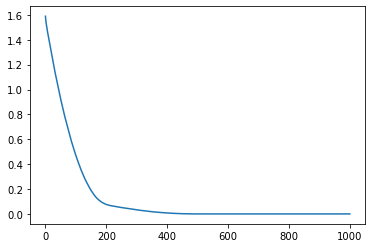

In [16]:
plt.plot(hist.history['loss'])
plt.show()

In [17]:
model.predict([0.01])

array([[0.3379391]], dtype=float32)

In [18]:
model.save('model/after_learning.h5')

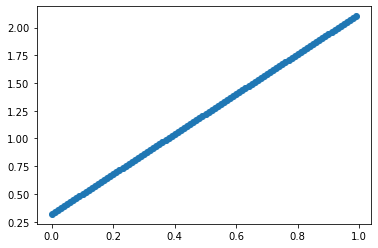

In [19]:
plt.scatter(x=scaled_data_C, y=scaled_data_F)

## 1.3 노이즈가 있는 데이터로 실습

In [20]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
#np.random.seed(123) #동일한 숫자 나오게 하고 싶을 때 시드 고정
noise = np.array(np.random.normal(0,0.1,100))
noised_scaled_data_F = scaled_data_F + noise

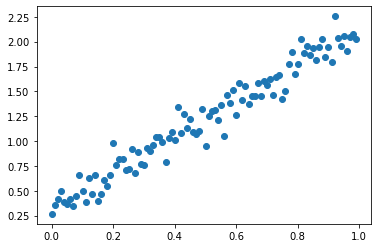

In [21]:
plt.scatter(x=scaled_data_C, y=noised_scaled_data_F)
plt.show()

In [22]:
#3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_dim=1))

#4. 모델학습과정 설정
model2.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
#5. 모델 학습시키기
hist2 = model2.fit(scaled_data_C, noised_scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 0.2414 - mae: 0.4707
Epoch 2/1000
4/4 - 0s - loss: 0.2304 - mae: 0.4590
Epoch 3/1000
4/4 - 0s - loss: 0.2230 - mae: 0.4513
Epoch 4/1000
4/4 - 0s - loss: 0.2165 - mae: 0.4442
Epoch 5/1000
4/4 - 0s - loss: 0.2107 - mae: 0.4379
Epoch 6/1000
4/4 - 0s - loss: 0.2051 - mae: 0.4317
Epoch 7/1000
4/4 - 0s - loss: 0.1994 - mae: 0.4252
Epoch 8/1000
4/4 - 0s - loss: 0.1939 - mae: 0.4189
Epoch 9/1000
4/4 - 0s - loss: 0.1892 - mae: 0.4135
Epoch 10/1000
4/4 - 0s - loss: 0.1842 - mae: 0.4075
Epoch 11/1000
4/4 - 0s - loss: 0.1792 - mae: 0.4016
Epoch 12/1000
4/4 - 0s - loss: 0.1749 - mae: 0.3964
Epoch 13/1000
4/4 - 0s - loss: 0.1704 - mae: 0.3908
Epoch 14/1000
4/4 - 0s - loss: 0.1657 - mae: 0.3850
Epoch 15/1000
4/4 - 0s - loss: 0.1613 - mae: 0.3794
Epoch 16/1000
4/4 - 0s - loss: 0.1565 - mae: 0.3732
Epoch 17/1000
4/4 - 0s - loss: 0.1521 - mae: 0.3675
Epoch 18/1000
4/4 - 0s - loss: 0.1478 - mae: 0.3618
Epoch 19/1000
4/4 - 0s - loss: 0.1433 - mae: 0.3558
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0869
Epoch 159/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 160/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0869
Epoch 161/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0869
Epoch 162/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 163/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0871
Epoch 164/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 165/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 166/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0870
Epoch 167/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 168/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 169/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 170/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 171/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 172/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 173/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 174/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 175/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 176/1000
4/4 - 0s - loss: 0.0126 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0874
Epoch 314/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 315/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 316/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0876
Epoch 317/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0873
Epoch 318/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 319/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 320/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0874
Epoch 321/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 322/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 323/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 324/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 325/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 326/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 327/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 328/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0873
Epoch 329/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 330/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 331/1000
4/4 - 0s - loss: 0.0126 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 469/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 470/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 471/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 472/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 473/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 474/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 475/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 476/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 477/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0874
Epoch 478/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0874
Epoch 479/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 480/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0873
Epoch 481/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0873
Epoch 482/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 483/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 484/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 485/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 486/1000
4/4 - 0s - loss: 0.0126 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0870
Epoch 624/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 625/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 626/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0872
Epoch 627/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 628/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0873
Epoch 629/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0871
Epoch 630/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0873
Epoch 631/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 632/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 633/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 634/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 635/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 636/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 637/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0873
Epoch 638/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 639/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 640/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 641/1000
4/4 - 0s - loss: 0.0126 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0870
Epoch 779/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 780/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 781/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0869
Epoch 782/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 783/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 784/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 785/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 786/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 787/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 788/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 789/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 790/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 791/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 792/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0873
Epoch 793/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 794/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 795/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 796/1000
4/4 - 0s - loss: 0.0126 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0876
Epoch 934/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0873
Epoch 935/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 936/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0874
Epoch 937/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 938/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 939/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0870
Epoch 940/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 941/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 942/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 943/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 944/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 945/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 946/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0871
Epoch 947/1000
4/4 - 0s - loss: 0.0127 - mae: 0.0873
Epoch 948/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0873
Epoch 949/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0873
Epoch 950/1000
4/4 - 0s - loss: 0.0126 - mae: 0.0872
Epoch 951/1000
4/4 - 0s - loss: 0.0127 - mae: 

In [24]:
print(model2.predict(np.array([0.01])))

[[0.34477708]]


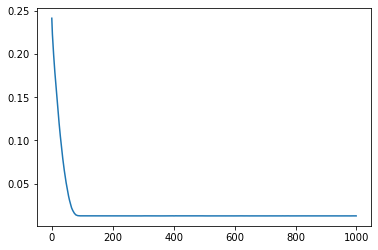

In [25]:
plt.plot(hist2.history['loss'])

In [26]:
model2.save('model/noise_after_learning.h5')